In [56]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec


from gwbird import detectors
from gwbird import pls
from gwbird import overlap 
from gwbird import nell 
from gwbird import skymap

from gwbird.skymap import Skymaps
from gwbird.overlap import Response
from gwbird.nell import AngularResponse, Sensitivity_ell

%config InlineBackend.figure_format = 'retina'

from astropy.cosmology import Planck15
cosmo = Planck15
H0 =  cosmo.H0.to('1/s').value

c = 299792458 #m/s

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example notebook for ET 2L $45^{\circ}$

* Response (Overlap Reduction function)

In [57]:
f = np.logspace(0, np.log10(3000), 1000)

print('Calculating Overlaps ET triangular')
print('- tensor modes')
R_t_ET_2L45 = Response.overlap('ET L1', 'ET L2', f, 0, 't', shift_angle=np.deg2rad(45))
print('- vector modes')
R_v_ET_2L45 = Response.overlap('ET L1', 'ET L2', f, 0, 'v', shift_angle=np.deg2rad(45))
print('- scalar modes')
R_s_ET_2L45 = Response.overlap('ET L1', 'ET L2', f, 0, 's', shift_angle=np.deg2rad(45))

Calculating Overlaps ET triangular
- tensor modes
- vector modes
- scalar modes


Text(0.5, 1.0, 'ET 2L $\\alpha=45^{\\circ}$ Response')

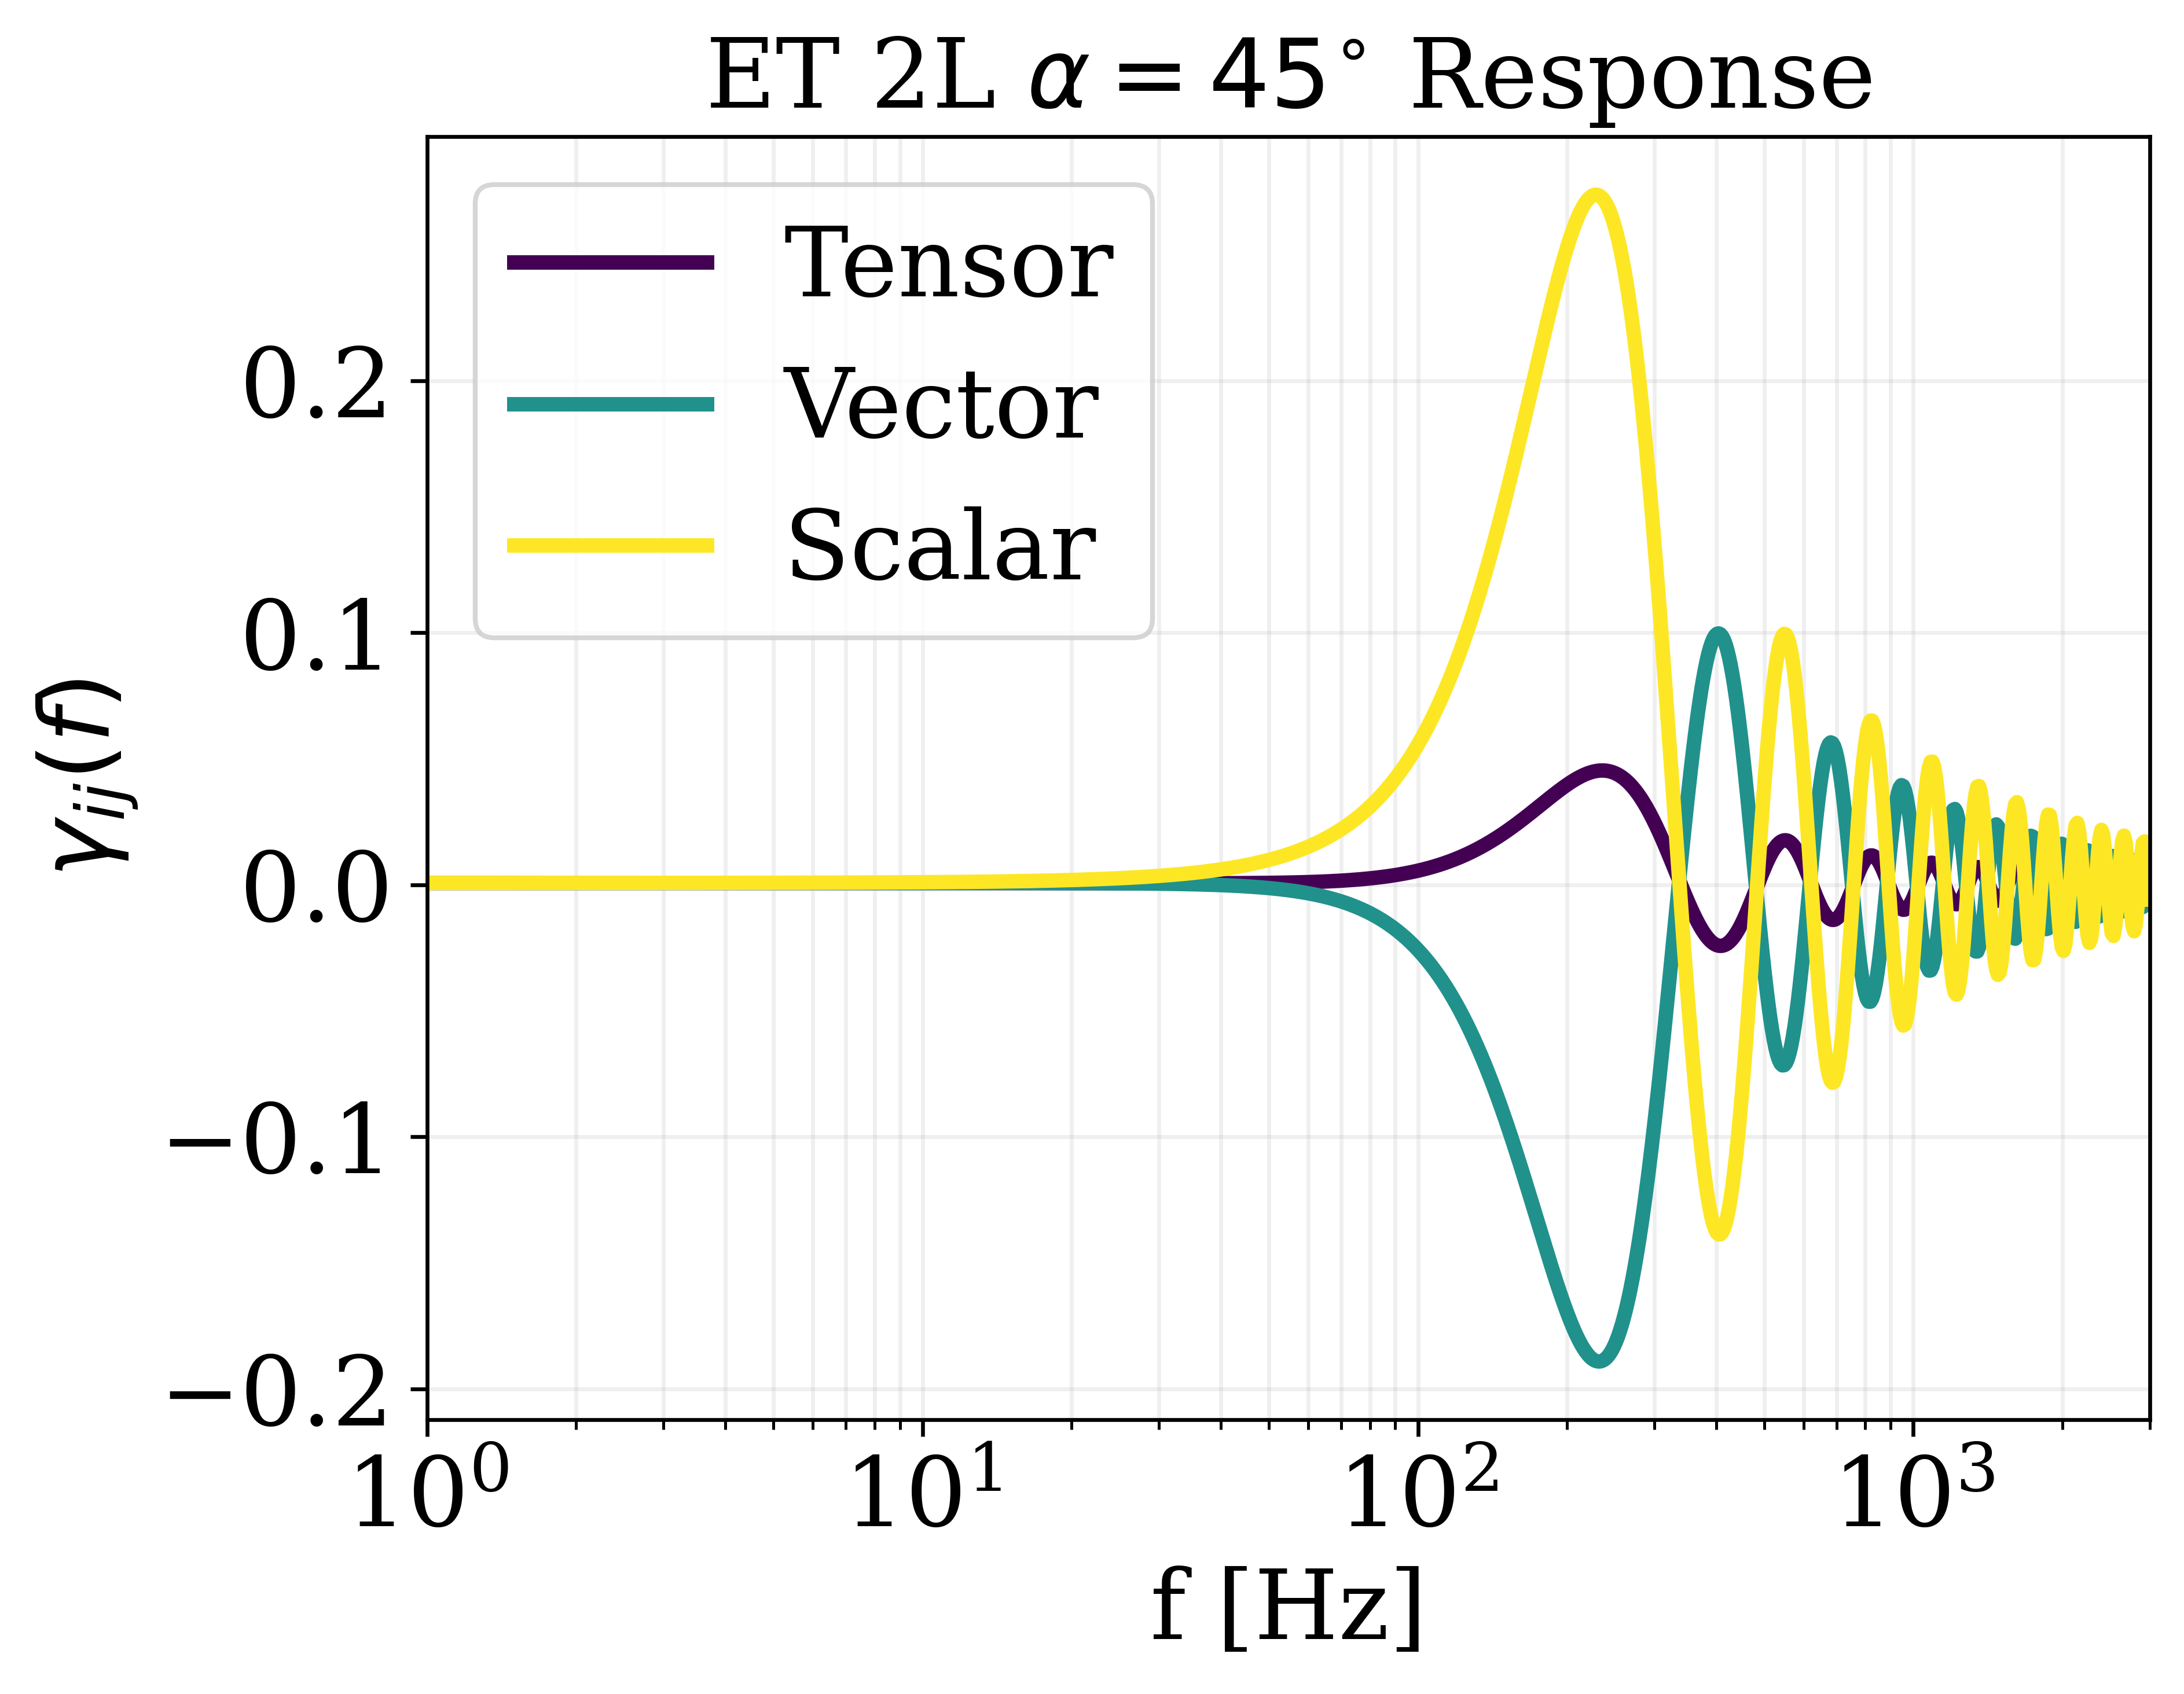

In [58]:
colors = cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, R_t_ET_2L45, label='Tensor', color = colors[0], rasterized=True) 
plt.plot(f, R_v_ET_2L45, label='Vector', color = colors[1], rasterized=True)
plt.plot(f, R_s_ET_2L45, label='Scalar', color= colors[2], rasterized=True)
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\gamma_{ij}(f)$')
plt.grid(alpha=0.2, which='both')
plt.xlim(1, 3000)
plt.legend()
plt.title(r'ET 2L $\alpha=45^{\circ}$ Response')

* Power Law Integrated Sensitivity Curve

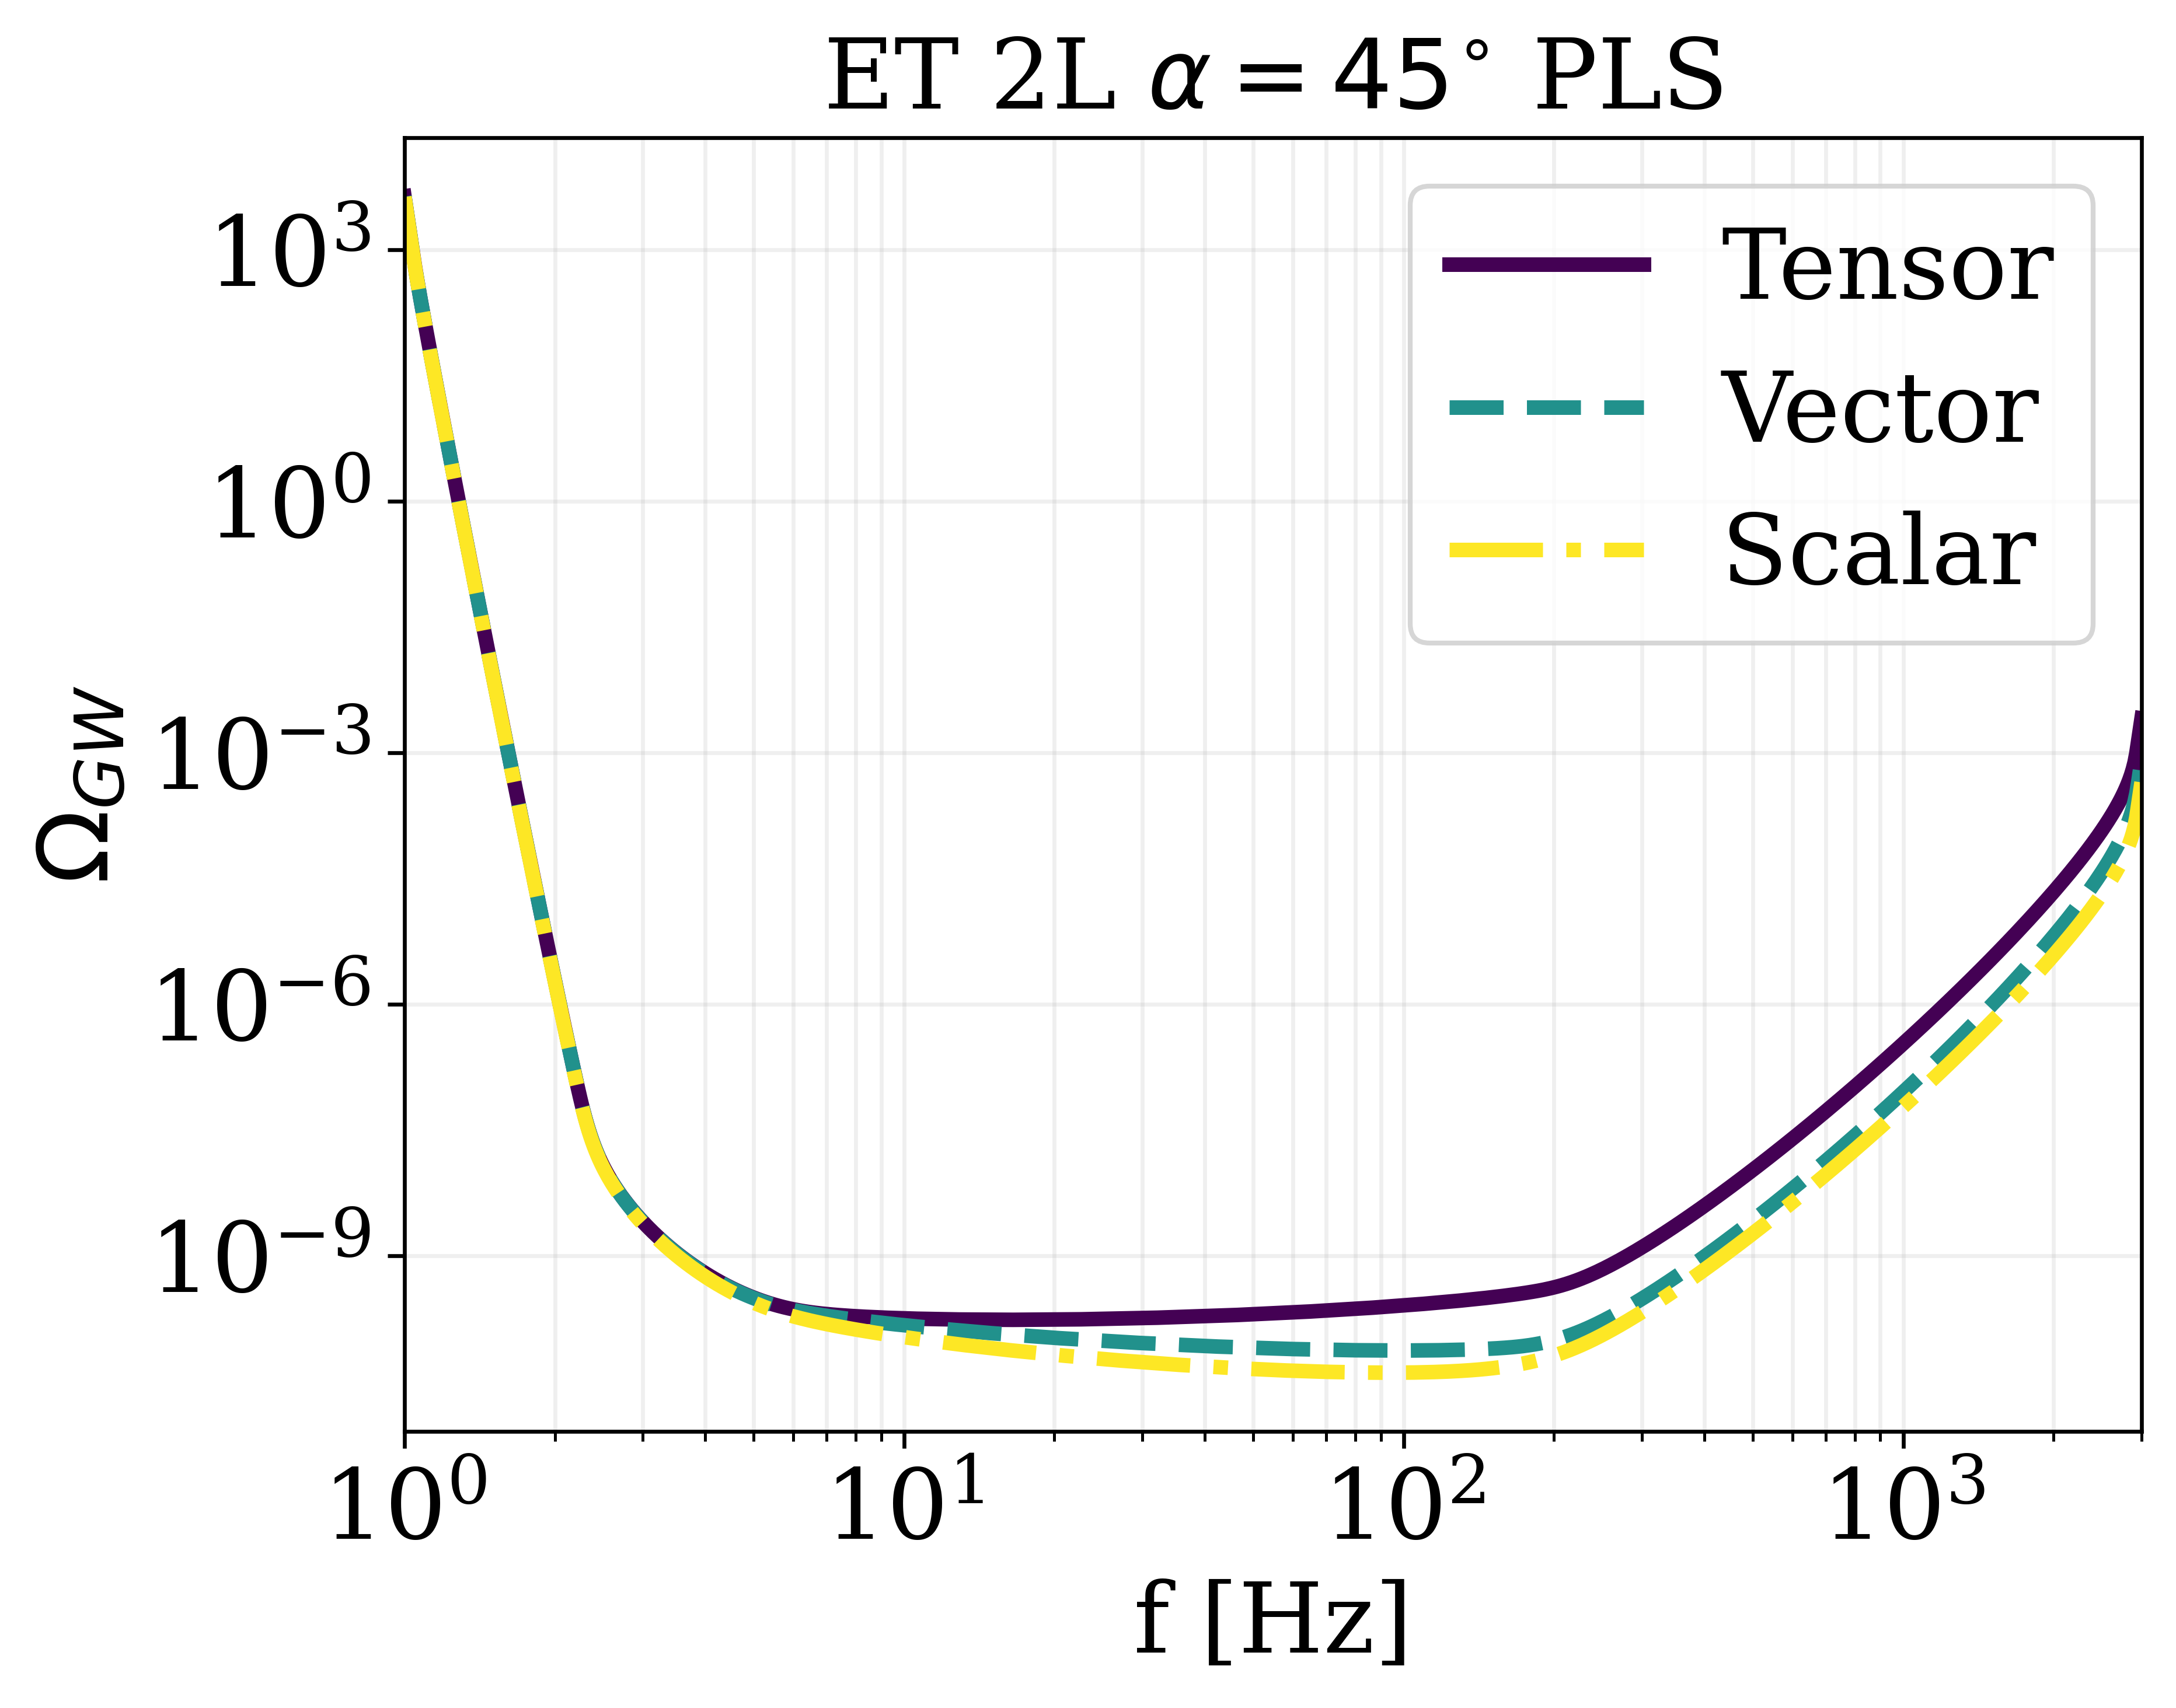

In [59]:
fref = 25
snr = 1
Tobs = 1
beta_min = -40
beta_max = 40

pls_ET_2L45_t = pls.PLS('ET L1', 'ET L2', f, fref, 't', snr, Tobs, beta_min, beta_max, shift_angle=np.deg2rad(45))
pls_ET_2L45_v = pls.PLS('ET L1', 'ET L2', f, fref, 'v', snr, Tobs, beta_min, beta_max, shift_angle=np.deg2rad(45))
pls_ET_2L45_s = pls.PLS('ET L1', 'ET L2', f, fref, 's', snr, Tobs, beta_min, beta_max, shift_angle=np.deg2rad(45))

colors = plt.cm.viridis(np.linspace(0, 1, 3))

plt.plot(f, pls_ET_2L45_t, label='Tensor', color=colors[0], rasterized=True)
plt.plot(f, pls_ET_2L45_v, label='Vector', color=colors[1], linestyle='--', rasterized=True)
plt.plot(f, pls_ET_2L45_s, label='Scalar', color=colors[2], linestyle='-.', rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.title(r'ET 2L $\alpha=45^{\circ}$ PLS')
plt.grid(alpha=0.2, which='both')
plt.xlim(1, 3000)
plt.legend()

In [60]:
print(np.min(pls_ET_2L45_t))
print(np.min(pls_ET_2L45_v))
print(np.min(pls_ET_2L45_s))

1.7065346301695717e-10
7.341548687015192e-11
3.993915257112263e-11


* Angular Response

In [61]:
f = np.logspace(0, np.log10(3000), 1000)

print('Calculating Angular response for the monopole...')   
print('- tensor modes')
R0_t_ET_2L45 = AngularResponse.R_ell(0, 'ET L1', 'ET L2', f, 't', shift_angle=np.deg2rad(45))
print('- vector modes')
R0_v_ET_2L45 = AngularResponse.R_ell(0, 'ET L1', 'ET L2', f, 'v', shift_angle=np.deg2rad(45))
print('- scalar modes')
R0_s_ET_2L45 = AngularResponse.R_ell(0, 'ET L1', 'ET L2', f, 's', shift_angle=np.deg2rad(45))

print('Calculating Angular response for the dipole...')   
print('- tensor modes')
R1_t_ET_2L45 = AngularResponse.R_ell(1, 'ET L1', 'ET L2', f, 't', shift_angle=np.deg2rad(45))
print('- vector modes')
R1_v_ET_2L45 = AngularResponse.R_ell(1, 'ET L1', 'ET L2', f, 'v', shift_angle=np.deg2rad(45))
print('- scalar modes')
R1_s_ET_2L45 = AngularResponse.R_ell(1, 'ET L1', 'ET L2', f, 's', shift_angle=np.deg2rad(45))

print('Calculating Angular response for the quadrupole...')   
print('- tensor modes')
R2_t_ET_2L45 = AngularResponse.R_ell(2, 'ET L1', 'ET L2', f, 't', shift_angle=np.deg2rad(45))
print('- vector modes')
R2_v_ET_2L45 = AngularResponse.R_ell(2, 'ET L1', 'ET L2', f, 'v', shift_angle=np.deg2rad(45))
print('- scalar modes')
R2_s_ET_2L45 = AngularResponse.R_ell(2, 'ET L1', 'ET L2', f, 's', shift_angle=np.deg2rad(45))

print('Calculating Angular response for the octupole...')   
print('- tensor modes')
R3_t_ET_2L45 = AngularResponse.R_ell(3, 'ET L1', 'ET L2', f, 't', shift_angle=np.deg2rad(45))
print('- vector modes')
R3_v_ET_2L45 = AngularResponse.R_ell(3, 'ET L1', 'ET L2', f, 'v', shift_angle=np.deg2rad(45))
print('- scalar modes')
R3_s_ET_2L45 = AngularResponse.R_ell(3, 'ET L1', 'ET L2', f, 's', shift_angle=np.deg2rad(45))


Calculating Angular response for the monopole...
- tensor modes
- vector modes
- scalar modes
Calculating Angular response for the dipole...
- tensor modes
- vector modes
- scalar modes
Calculating Angular response for the quadrupole...
- tensor modes
- vector modes
- scalar modes
Calculating Angular response for the octupole...
- tensor modes
- vector modes
- scalar modes


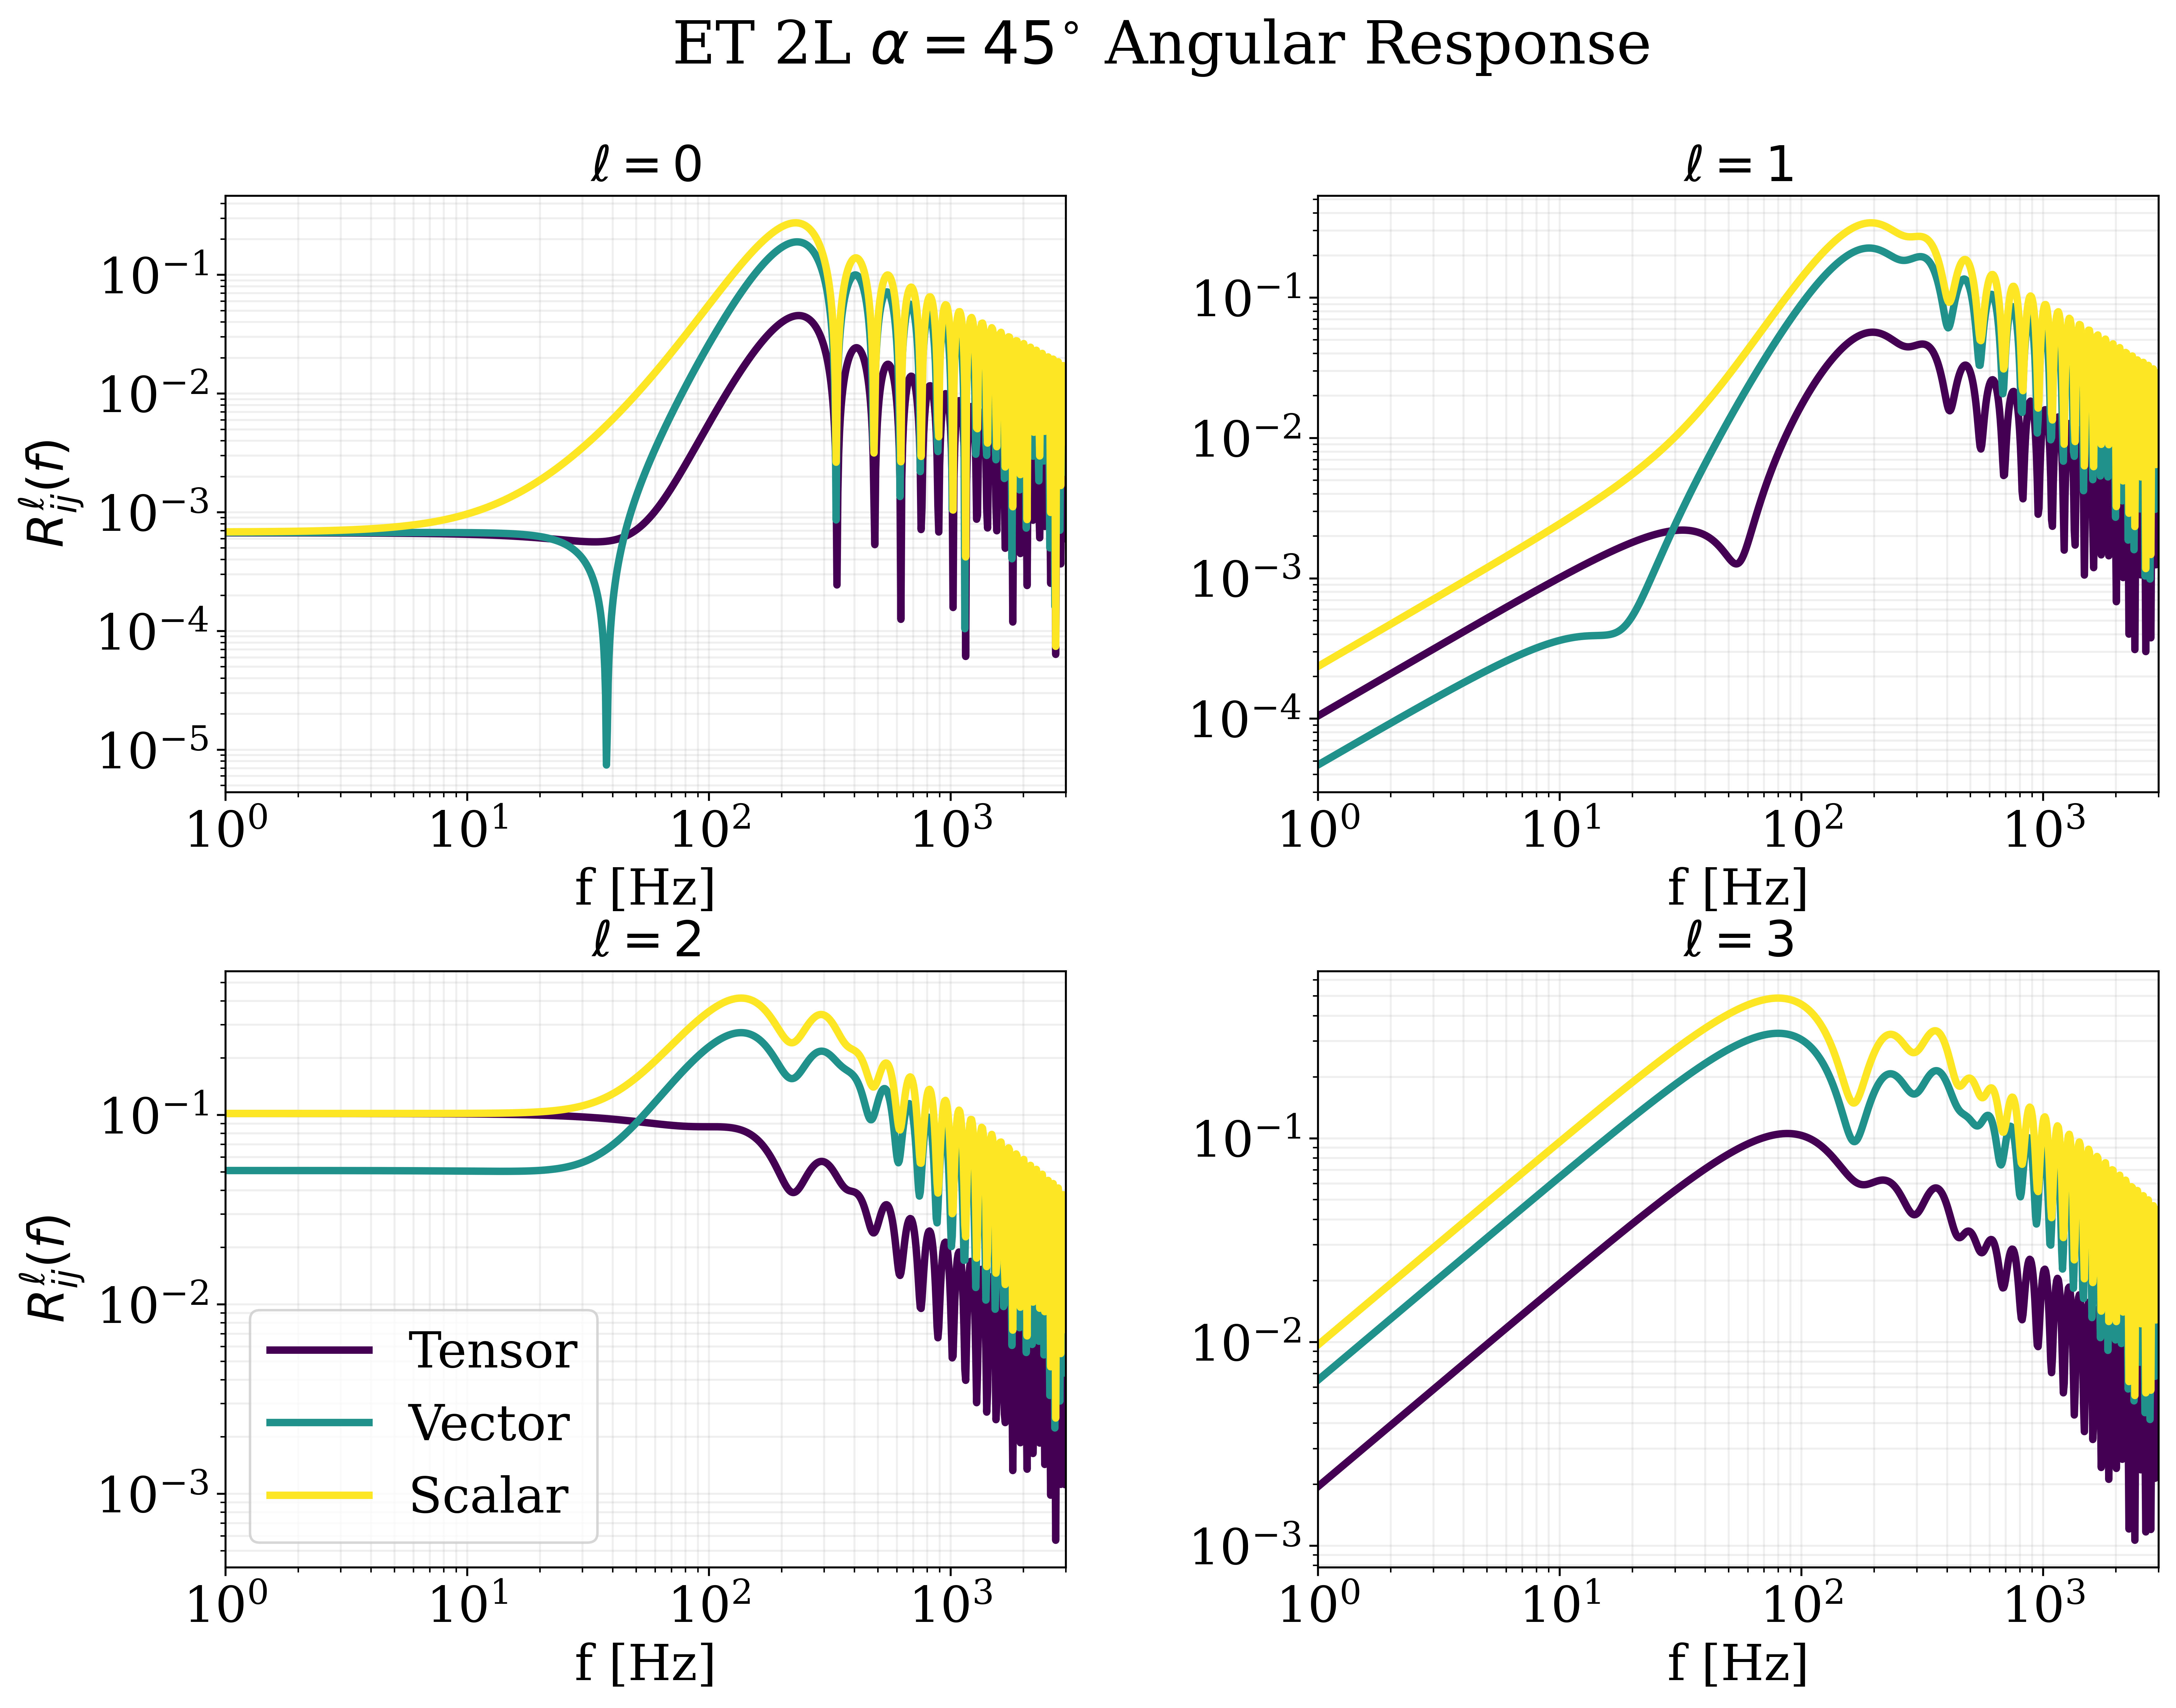

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})

colors = plt.cm.viridis(np.linspace(0, 1, 3))

# monopole
axs[0, 0].plot(f, R0_t_ET_2L45, label='Tensor', color=colors[0], rasterized=True)
axs[0, 0].plot(f, R0_v_ET_2L45, label='Vector', color=colors[1], rasterized=True)
axs[0, 0].plot(f, R0_s_ET_2L45, label='Scalar', color=colors[2], rasterized=True)
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('f [Hz]')
axs[0, 0].set_ylabel(r'$R_{ij}^{\ell}(f)$')
#axs[0, 0].legend()
axs[0, 0].grid(alpha=0.2, which='both')
axs[0, 0].set_xlim(1, 3000)
axs[0, 0].set_title(r'$\ell = 0$')

# dipole
axs[0, 1].plot(f, R1_t_ET_2L45, label='Tensor', color=colors[0], rasterized=True)
axs[0, 1].plot(f, R1_v_ET_2L45, label='Vector', color=colors[1], rasterized=True)
axs[0, 1].plot(f, R1_s_ET_2L45, label='Scalar', color=colors[2], rasterized=True)
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('f [Hz]')
#axs[0, 1].legend()
axs[0, 1].grid(alpha=0.2, which='both')
axs[0, 1].set_xlim(1, 3000)
axs[0, 1].set_title(r'$\ell = 1$')

# quadrupole
axs[1, 0].plot(f, R2_t_ET_2L45, label='Tensor', color=colors[0], rasterized=True)
axs[1, 0].plot(f, R2_v_ET_2L45, label='Vector', color=colors[1], rasterized=True)
axs[1, 0].plot(f, R2_s_ET_2L45, label='Scalar', color=colors[2], rasterized=True)
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('f [Hz]')
axs[1, 0].set_ylabel(r'$R_{ij}^{\ell}(f)$')
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.2, which='both')
axs[1, 0].set_xlim(1, 3000)
axs[1, 0].set_title(r'$\ell = 2$')

# octupole
axs[1, 1].plot(f, R3_t_ET_2L45, label='Tensor', color=colors[0], rasterized=True)
axs[1, 1].plot(f, R3_v_ET_2L45, label='Vector', color=colors[1], rasterized=True)
axs[1, 1].plot(f, R3_s_ET_2L45, label='Scalar', color=colors[2], rasterized=True)
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('f [Hz]')
#axs[1, 1].legend()
axs[1, 1].grid(alpha=0.2, which='both')
axs[1, 1].set_xlim(1, 3000)
axs[1, 1].set_title(r'$\ell = 3$')

# Imposta il titolo principale
fig.suptitle(r'ET 2L $\alpha=45^{\circ}$ Angular Response')

plt.show()

* Sensitivity curver for the multipoles


1.7065346301695711e-10
1.0403198960046559e-08
1.2655263216042774e-10
5.949444984806567e-10


Text(0.5, 1.0, 'ET 2L $\\alpha=45^{\\circ}$ angular PLS (tensors)')

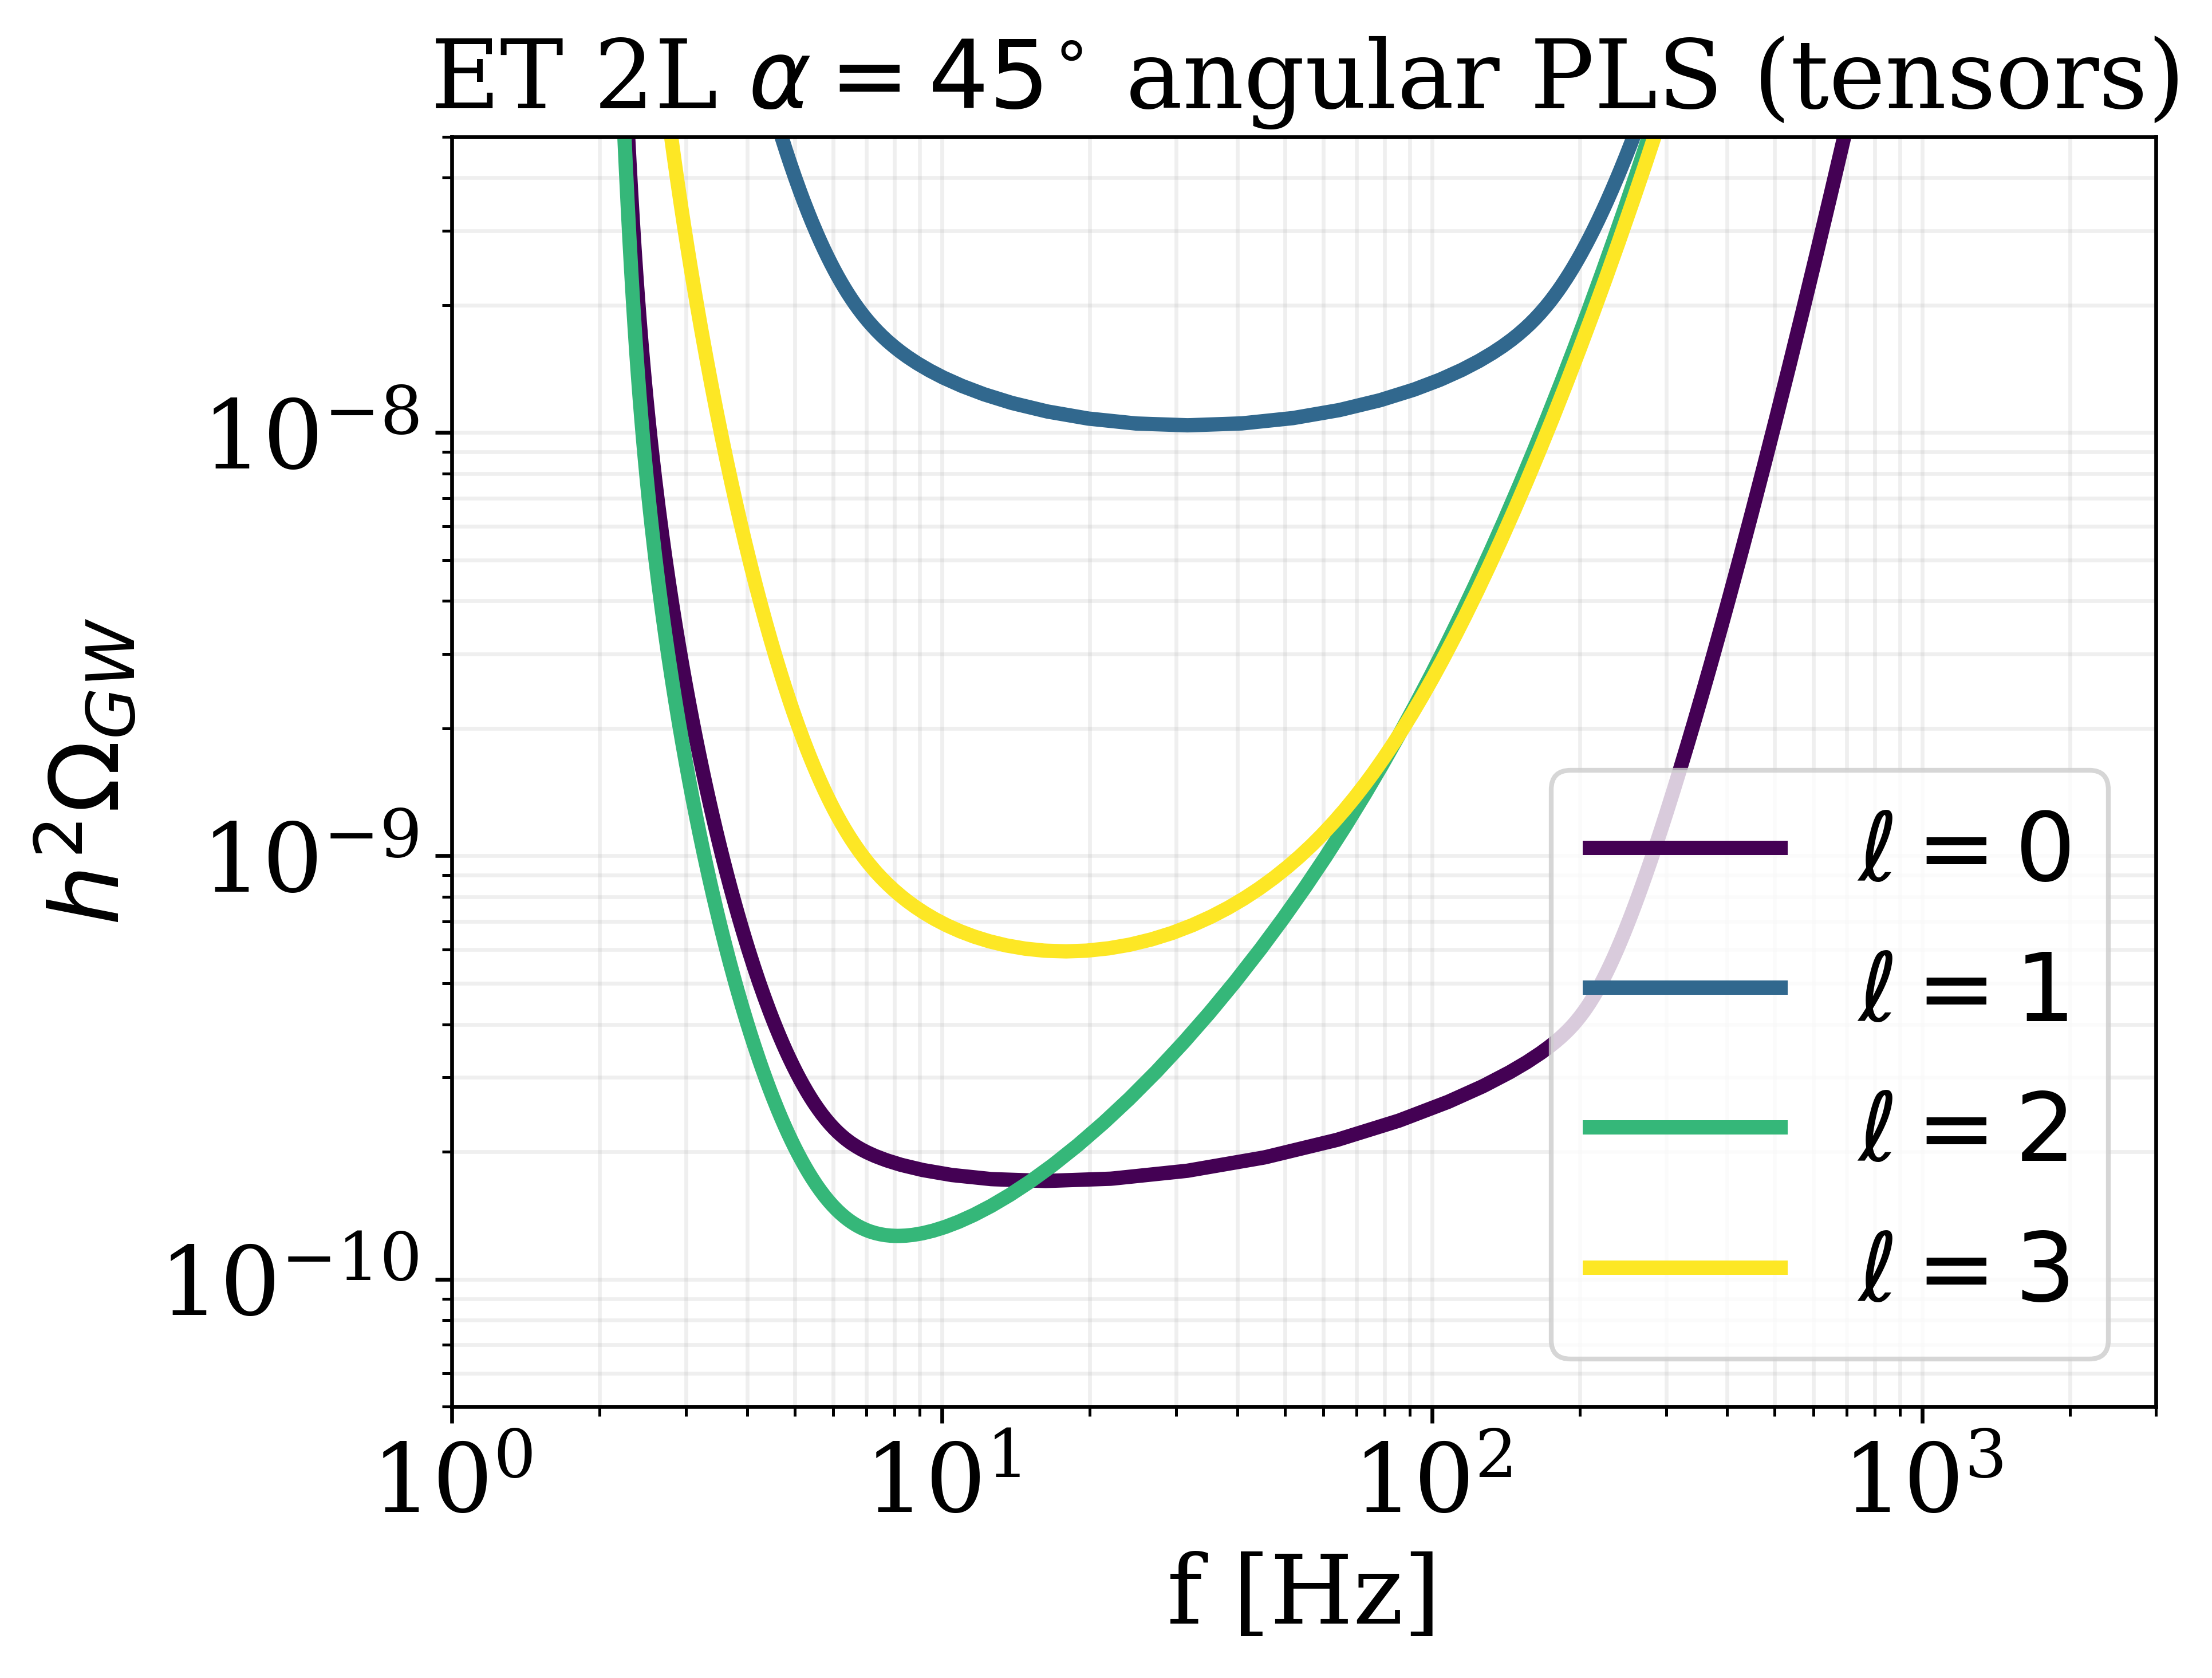

In [63]:
#tensors

colors = plt.cm.viridis(np.linspace(0, 1, 4))

snr = 1
Tobs = 1
beta_min = -40
beta_max = 40

pls_ET_2L45_t_0 = Sensitivity_ell.PLS_l('ET L1', 'ET L2', R0_t_ET_2L45, f, fref, snr, Tobs, beta_min, beta_max, 1, 't', shift_angle=np.deg2rad(45))
pls_ET_2L45_t_1 = Sensitivity_ell.PLS_l('ET L1', 'ET L2', R1_t_ET_2L45, f, fref, snr, Tobs, beta_min, beta_max, 1e-4, 't', shift_angle=np.deg2rad(45))
pls_ET_2L45_t_2 = Sensitivity_ell.PLS_l('ET L1', 'ET L2', R2_t_ET_2L45, f, fref, snr, Tobs, beta_min, beta_max, 1e-4, 't', shift_angle=np.deg2rad(45))
pls_ET_2L45_t_3 = Sensitivity_ell.PLS_l('ET L1', 'ET L2', R3_t_ET_2L45, f, fref, snr, Tobs, beta_min, beta_max, 1e-4, 't', shift_angle=np.deg2rad(45))


print(np.min(pls_ET_2L45_t_0))
print(np.min(pls_ET_2L45_t_1))
print(np.min(pls_ET_2L45_t_2))
print(np.min(pls_ET_2L45_t_3))



plt.plot(f, pls_ET_2L45_t_0, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls_ET_2L45_t_1, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls_ET_2L45_t_2, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls_ET_2L45_t_3, label=r'$\ell=3$', color=colors[3], rasterized=True) 
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.legend()
plt.grid(alpha=0.2, which='both')
plt.xlim(1, 3000)
plt.ylim(5e-11, 5e-8)
plt.title(r'ET 2L $\alpha=45^{\circ}$ angular PLS (tensors)')


7.34154868701519e-11
9.916311359426697e-10
7.764475505935507e-11
5.6942026947994315e-11


Text(0.5, 1.0, 'ET 2L $\\alpha=45^{\\circ}$ angular PLS (vectors)')

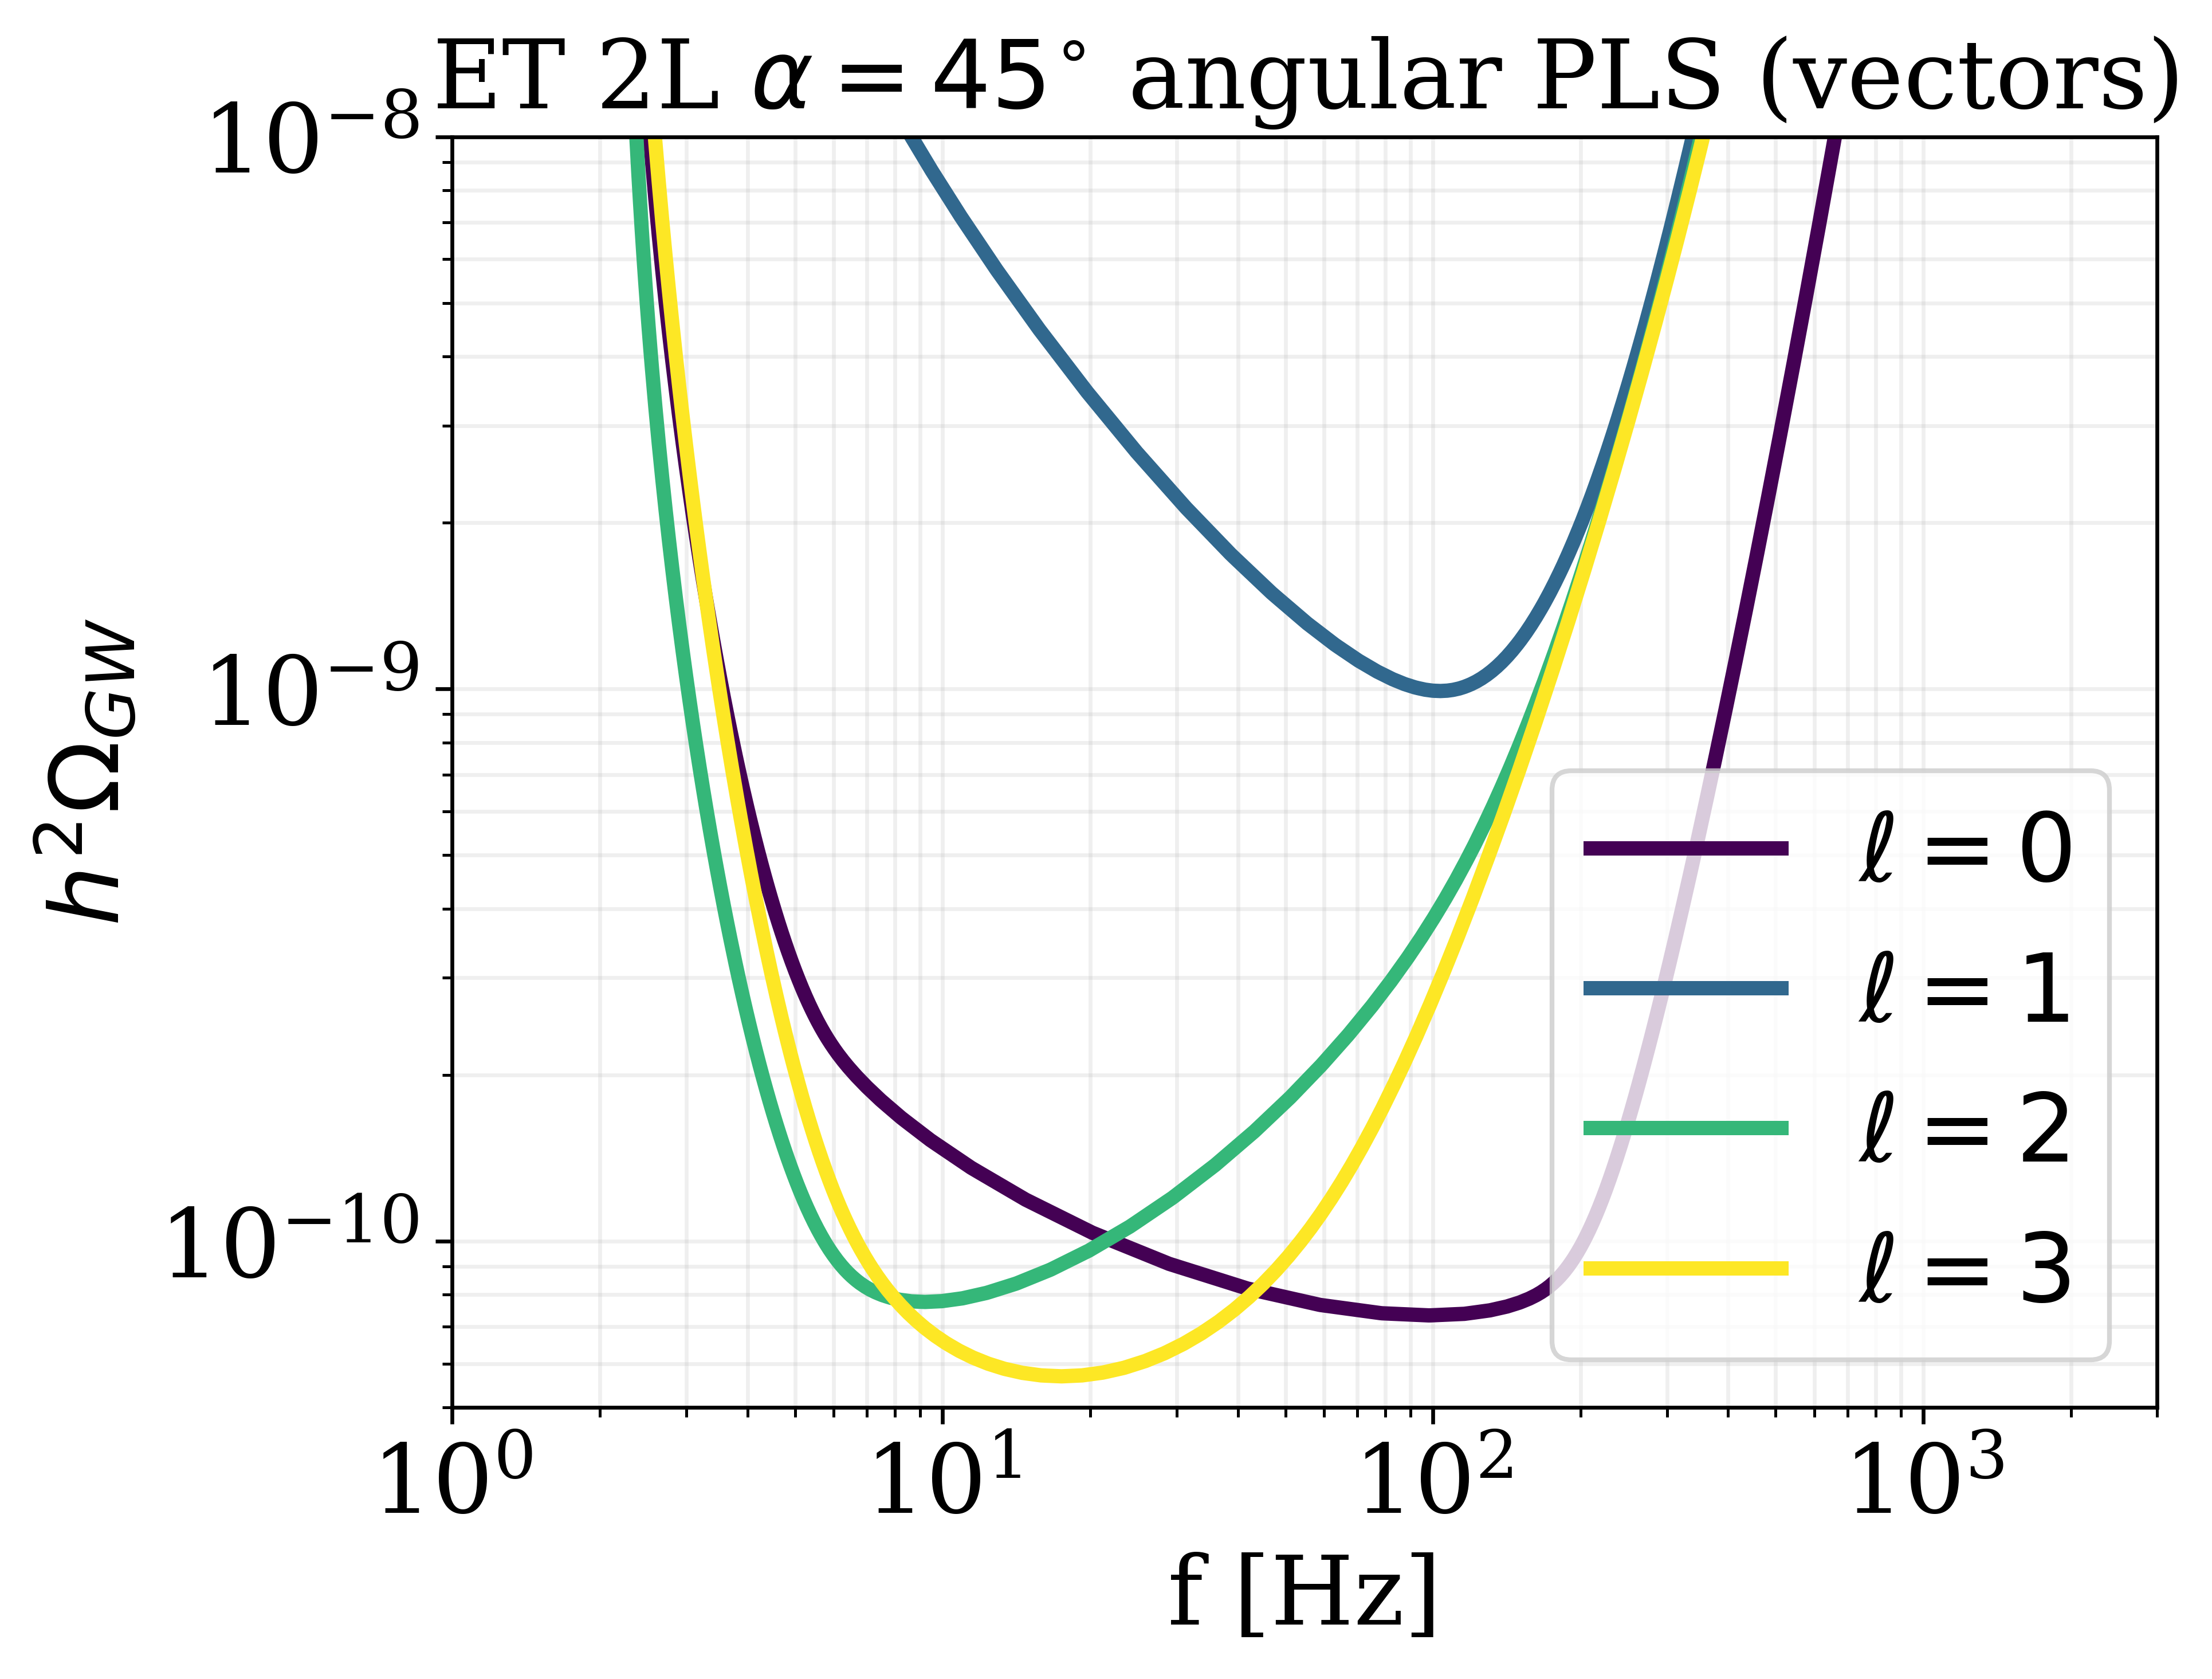

In [64]:
#vectors

pls_ET_2L45_v_0 = Sensitivity_ell.PLS_l('ET L1', 'ET L2', R0_v_ET_2L45, f, fref, snr, Tobs, beta_min, beta_max, 1, 'v', shift_angle=np.deg2rad(45))
pls_ET_2L45_v_1 = Sensitivity_ell.PLS_l('ET L1', 'ET L2', R1_v_ET_2L45, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 'v', shift_angle=np.deg2rad(45))
pls_ET_2L45_v_2 = Sensitivity_ell.PLS_l('ET L1', 'ET L2', R2_v_ET_2L45, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 'v', shift_angle=np.deg2rad(45))
pls_ET_2L45_v_3 = Sensitivity_ell.PLS_l('ET L1', 'ET L2', R3_v_ET_2L45, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 'v', shift_angle=np.deg2rad(45))


print(np.min(pls_ET_2L45_v_0))
print(np.min(pls_ET_2L45_v_1))
print(np.min(pls_ET_2L45_v_2))
print(np.min(pls_ET_2L45_v_3))

plt.plot(f, pls_ET_2L45_v_0, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls_ET_2L45_v_1, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls_ET_2L45_v_2, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls_ET_2L45_v_3, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.legend()
plt.grid(alpha=0.2, which='both')
plt.xlim(1, 3000)
plt.ylim(5e-11, 1e-8)
plt.title(r'ET 2L $\alpha=45^{\circ}$ angular PLS (vectors)')


3.993915257112263e-11
5.697288279872942e-10
3.899812162962278e-11
3.825180503501109e-11


Text(0.5, 1.0, 'ET 2L $\\alpha=45^{\\circ}$ angular PLS (scalars)')

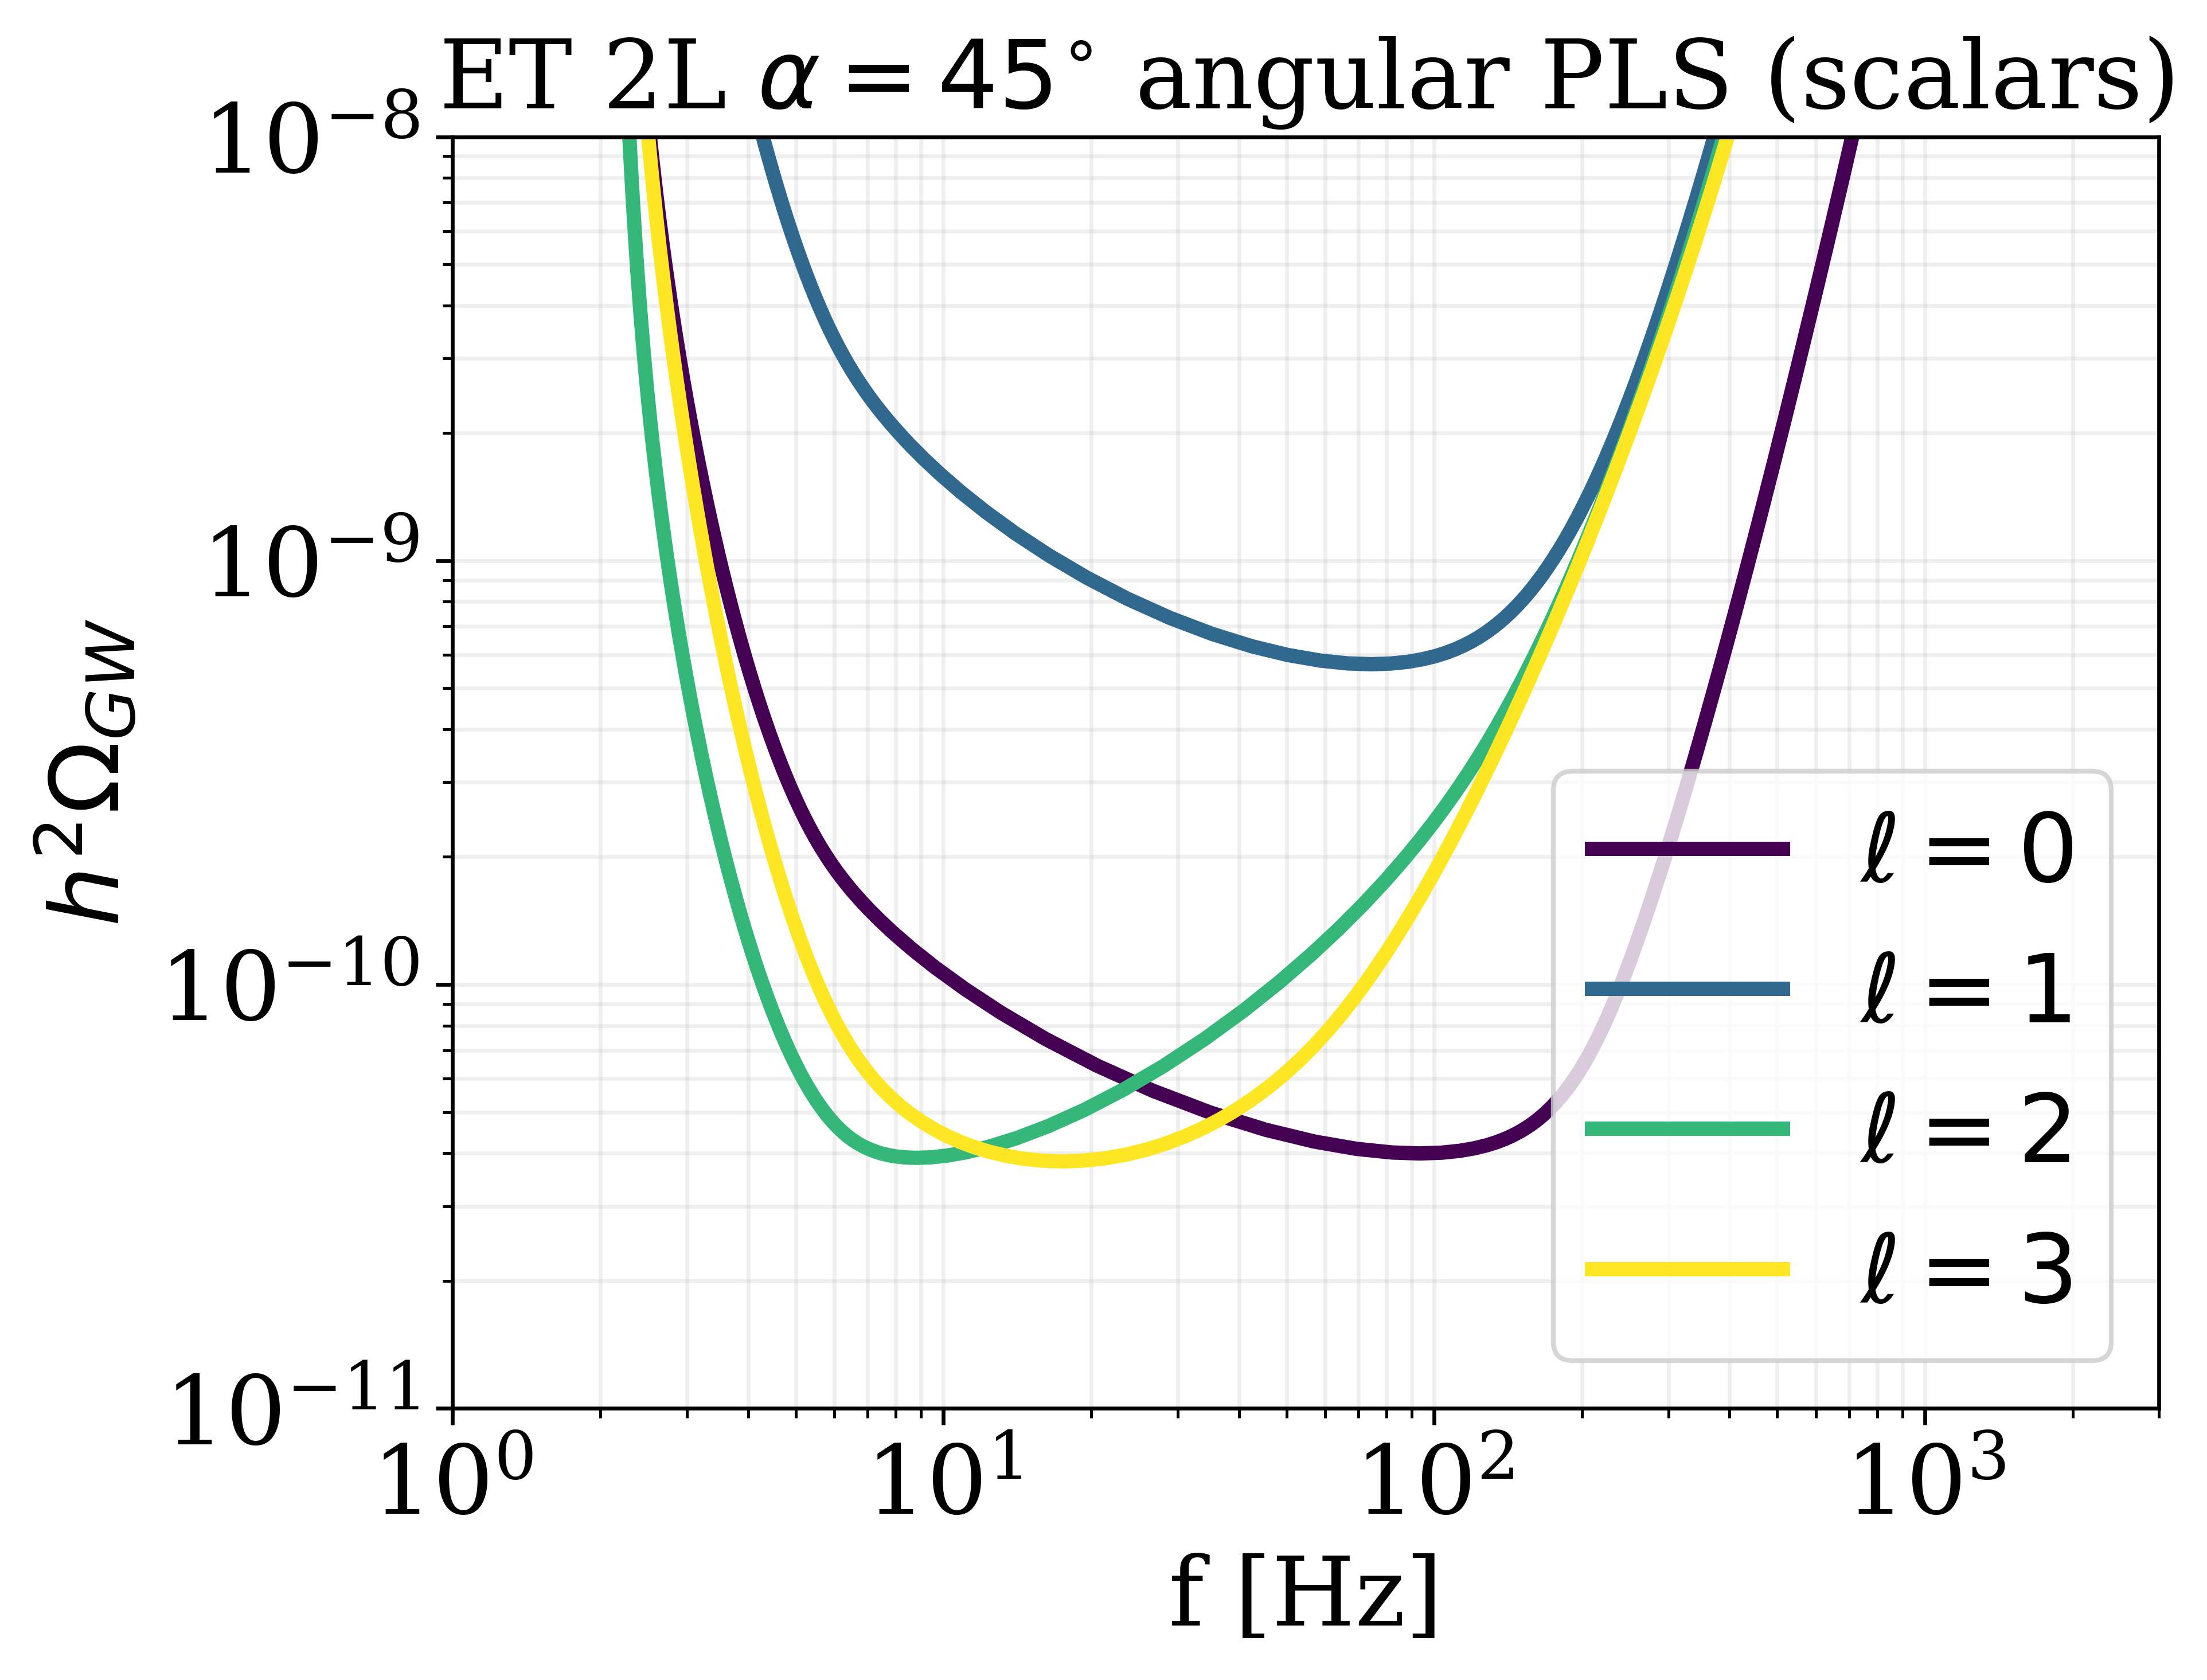

In [65]:
#scalars

pls_ET_2L45_s_0 = Sensitivity_ell.PLS_l('ET L1', 'ET L2', R0_s_ET_2L45, f, fref, snr, Tobs, beta_min, beta_max, 1, 's', shift_angle=np.deg2rad(45))
pls_ET_2L45_s_1 = Sensitivity_ell.PLS_l('ET L1', 'ET L2', R1_s_ET_2L45, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 's', shift_angle=np.deg2rad(45))
pls_ET_2L45_s_2 = Sensitivity_ell.PLS_l('ET L1', 'ET L2', R2_s_ET_2L45, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 's', shift_angle=np.deg2rad(45))
pls_ET_2L45_s_3 = Sensitivity_ell.PLS_l('ET L1', 'ET L2', R3_s_ET_2L45, f, fref, snr, Tobs, beta_min, beta_max, 1e-3, 's', shift_angle=np.deg2rad(45))


print(np.min(pls_ET_2L45_s_0))
print(np.min(pls_ET_2L45_s_1))
print(np.min(pls_ET_2L45_s_2))
print(np.min(pls_ET_2L45_s_3))

plt.plot(f, pls_ET_2L45_s_0, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls_ET_2L45_s_1, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls_ET_2L45_s_2, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls_ET_2L45_s_3, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}$')
plt.legend()
plt.grid(alpha=0.2, which='both')
plt.xlim(1, 3000)
plt.ylim(1e-11, 1e-8)
plt.title(r'ET 2L $\alpha=45^{\circ}$ angular PLS (scalars)')


* ET 2L $\alpha=45^{\circ}$ + CE sensitivity to X polarization modes

In [66]:

f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 1
Tobs = 1
beta_min = -40
beta_max = 40

pls_tv_etCE = pls.PLS_2pol('ET L1', 'ET L2', 'CE', f, fref, 'v', snr, Tobs, beta_min, beta_max, np.deg2rad(45))
pls_ts_etCE = pls.PLS_2pol('ET L1', 'ET L2', 'CE', f, fref, 's', snr, Tobs, beta_min, beta_max, np.deg2rad(45))

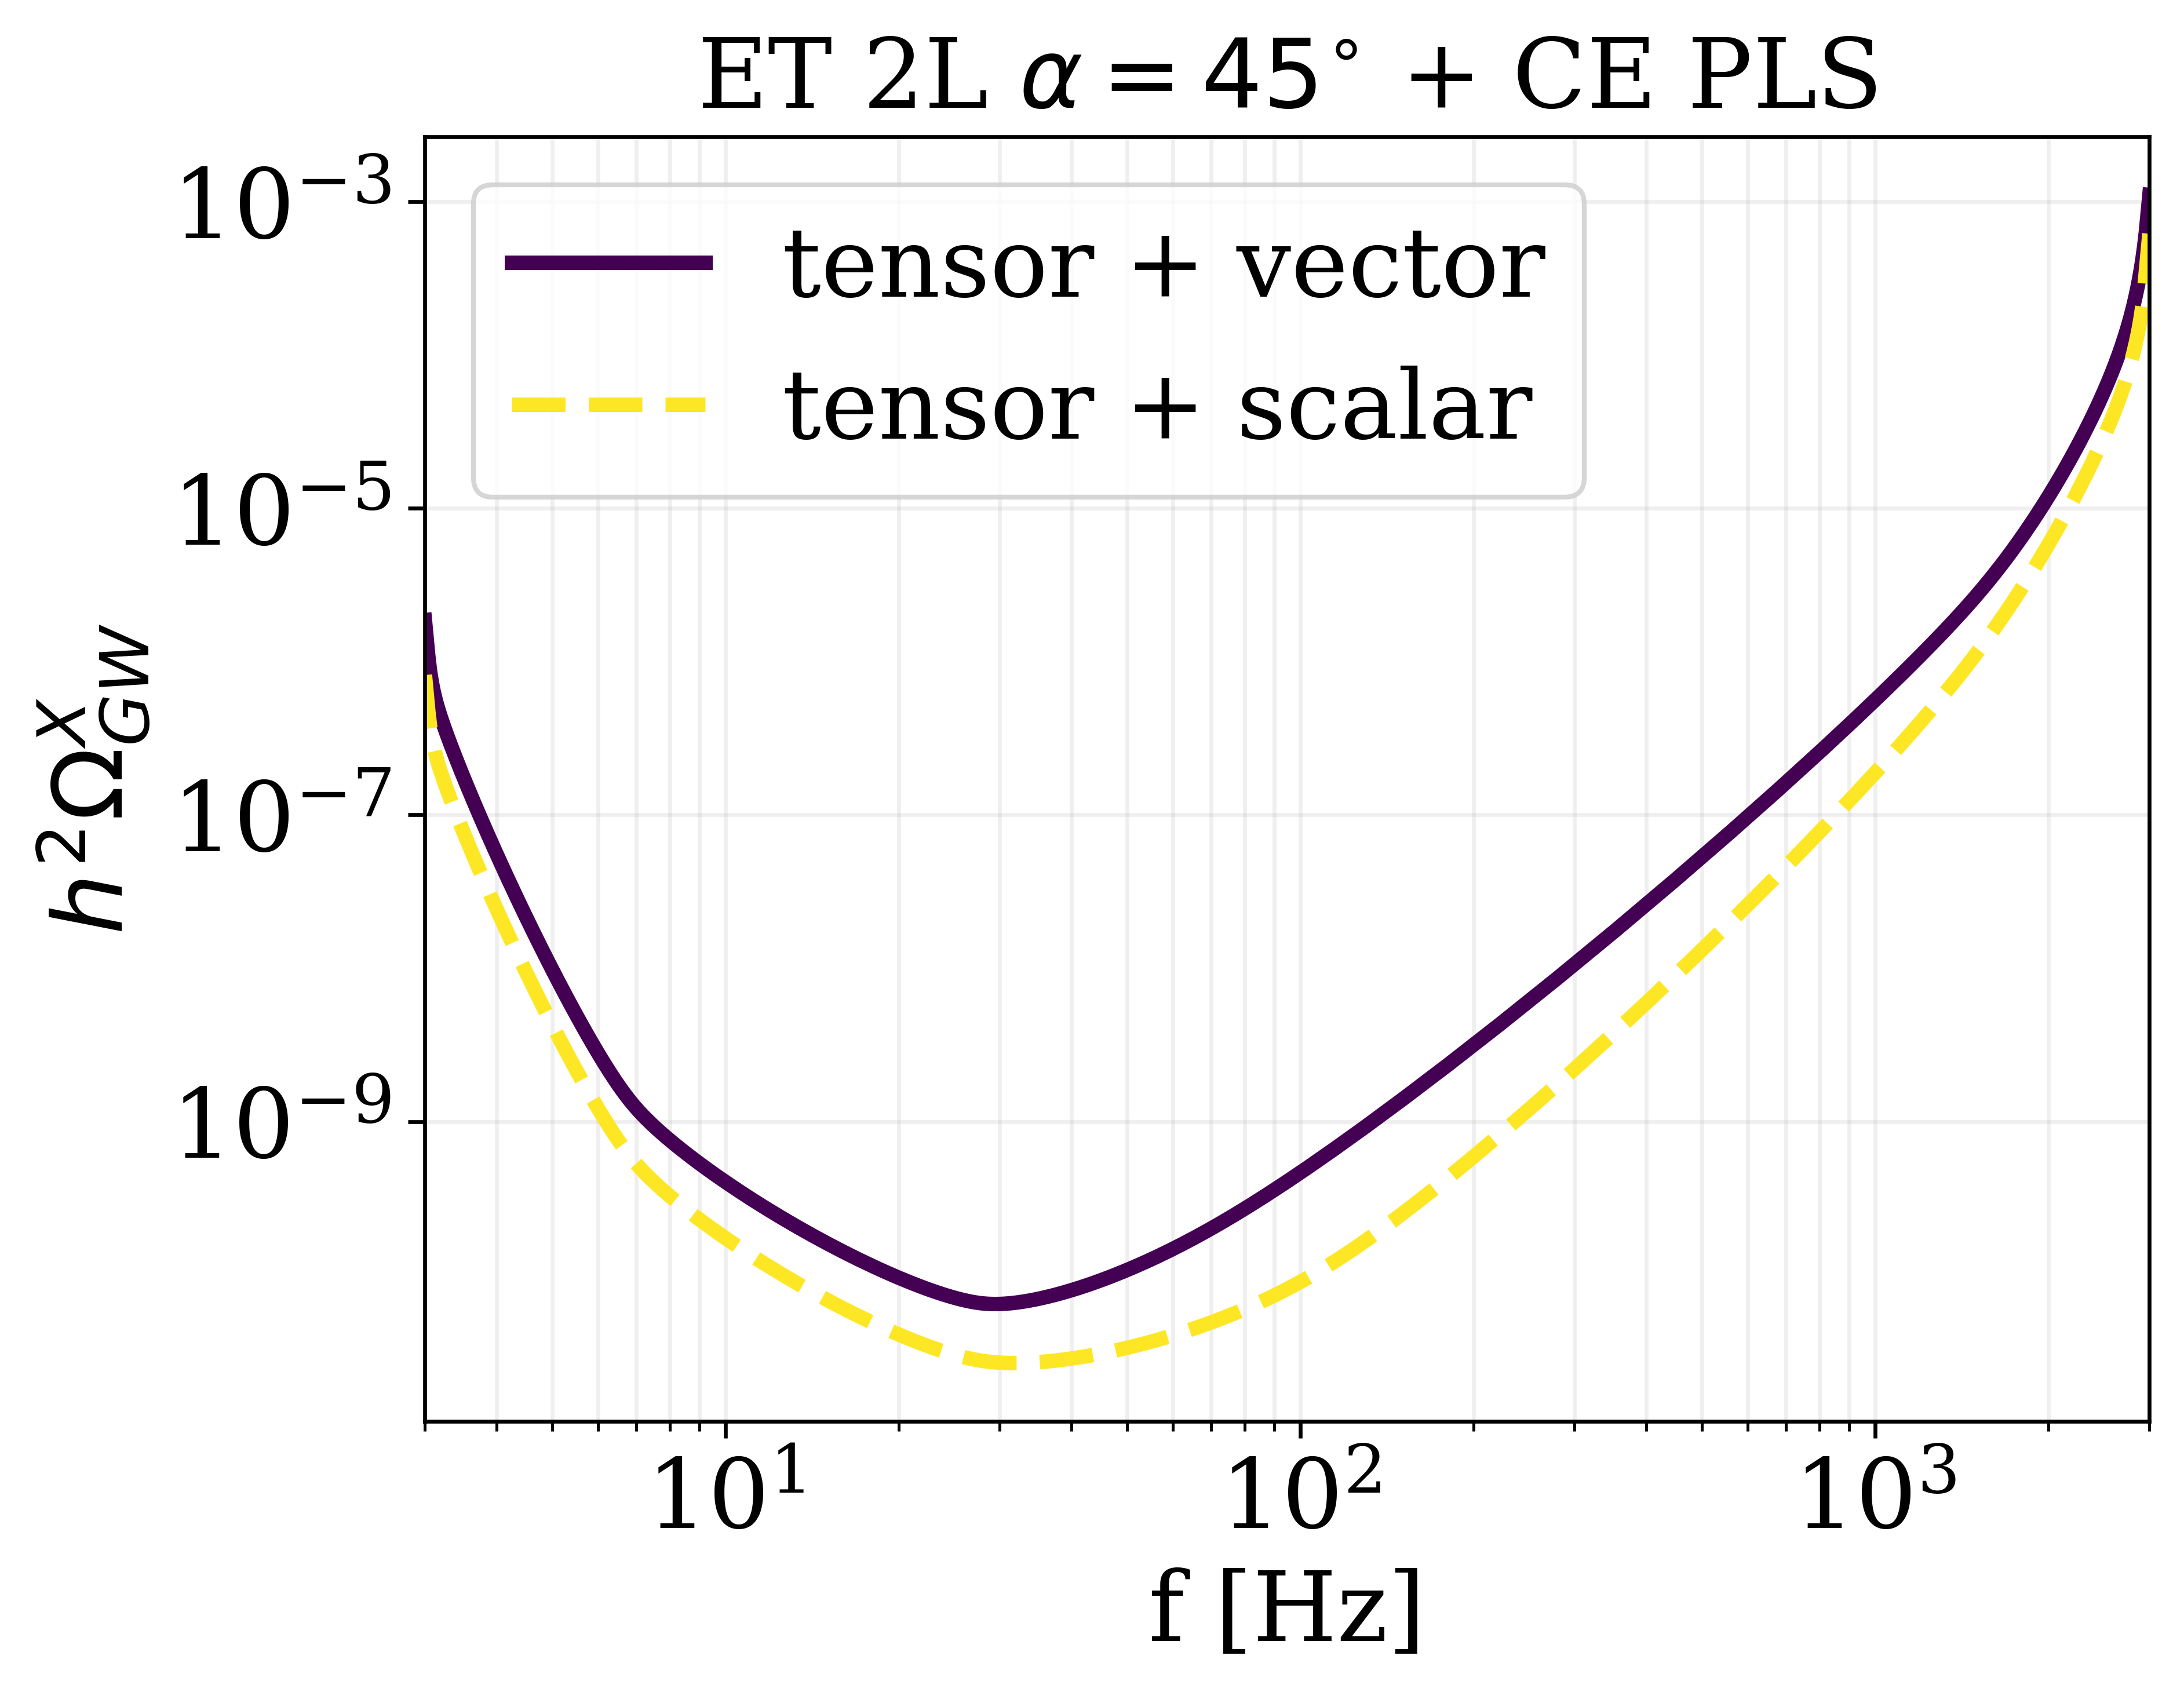

In [67]:
colors = plt.cm.viridis(np.linspace(0, 1, 2))
plt.plot(f, pls_tv_etCE, label='tensor + vector', color=colors[0], rasterized=True)
plt.plot(f, pls_ts_etCE, label='tensor + scalar', linestyle='--', color=colors[1], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}^X$')
plt.xlim(3, 3e3)
plt.title(r'ET 2L $\alpha=45^{\circ}$ + CE PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()

In [68]:
# find minimum

min_PLS_tv = np.min(pls_tv_etCE)
print('min PLS tv', min_PLS_tv)

min_PLS_ts = np.min(pls_ts_etCE)
print('min PLS ts', min_PLS_ts)

min PLS tv 6.450354763818248e-11
min PLS ts 2.6573872161582066e-11


In [69]:
# tensor + vector + scalar modes

f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 1
Tobs = 1
beta_min = -40
beta_max = 40

pls_t_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 't', snr, Tobs, beta_min, beta_max, np.deg2rad(45))
pls_v_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 'v', snr, Tobs, beta_min, beta_max, np.deg2rad(45))
pls_s_etCE = pls.PLS_3pol('ET L1', 'ET L2', 'CE', f, fref, 's', snr, Tobs, beta_min, beta_max, np.deg2rad(45))

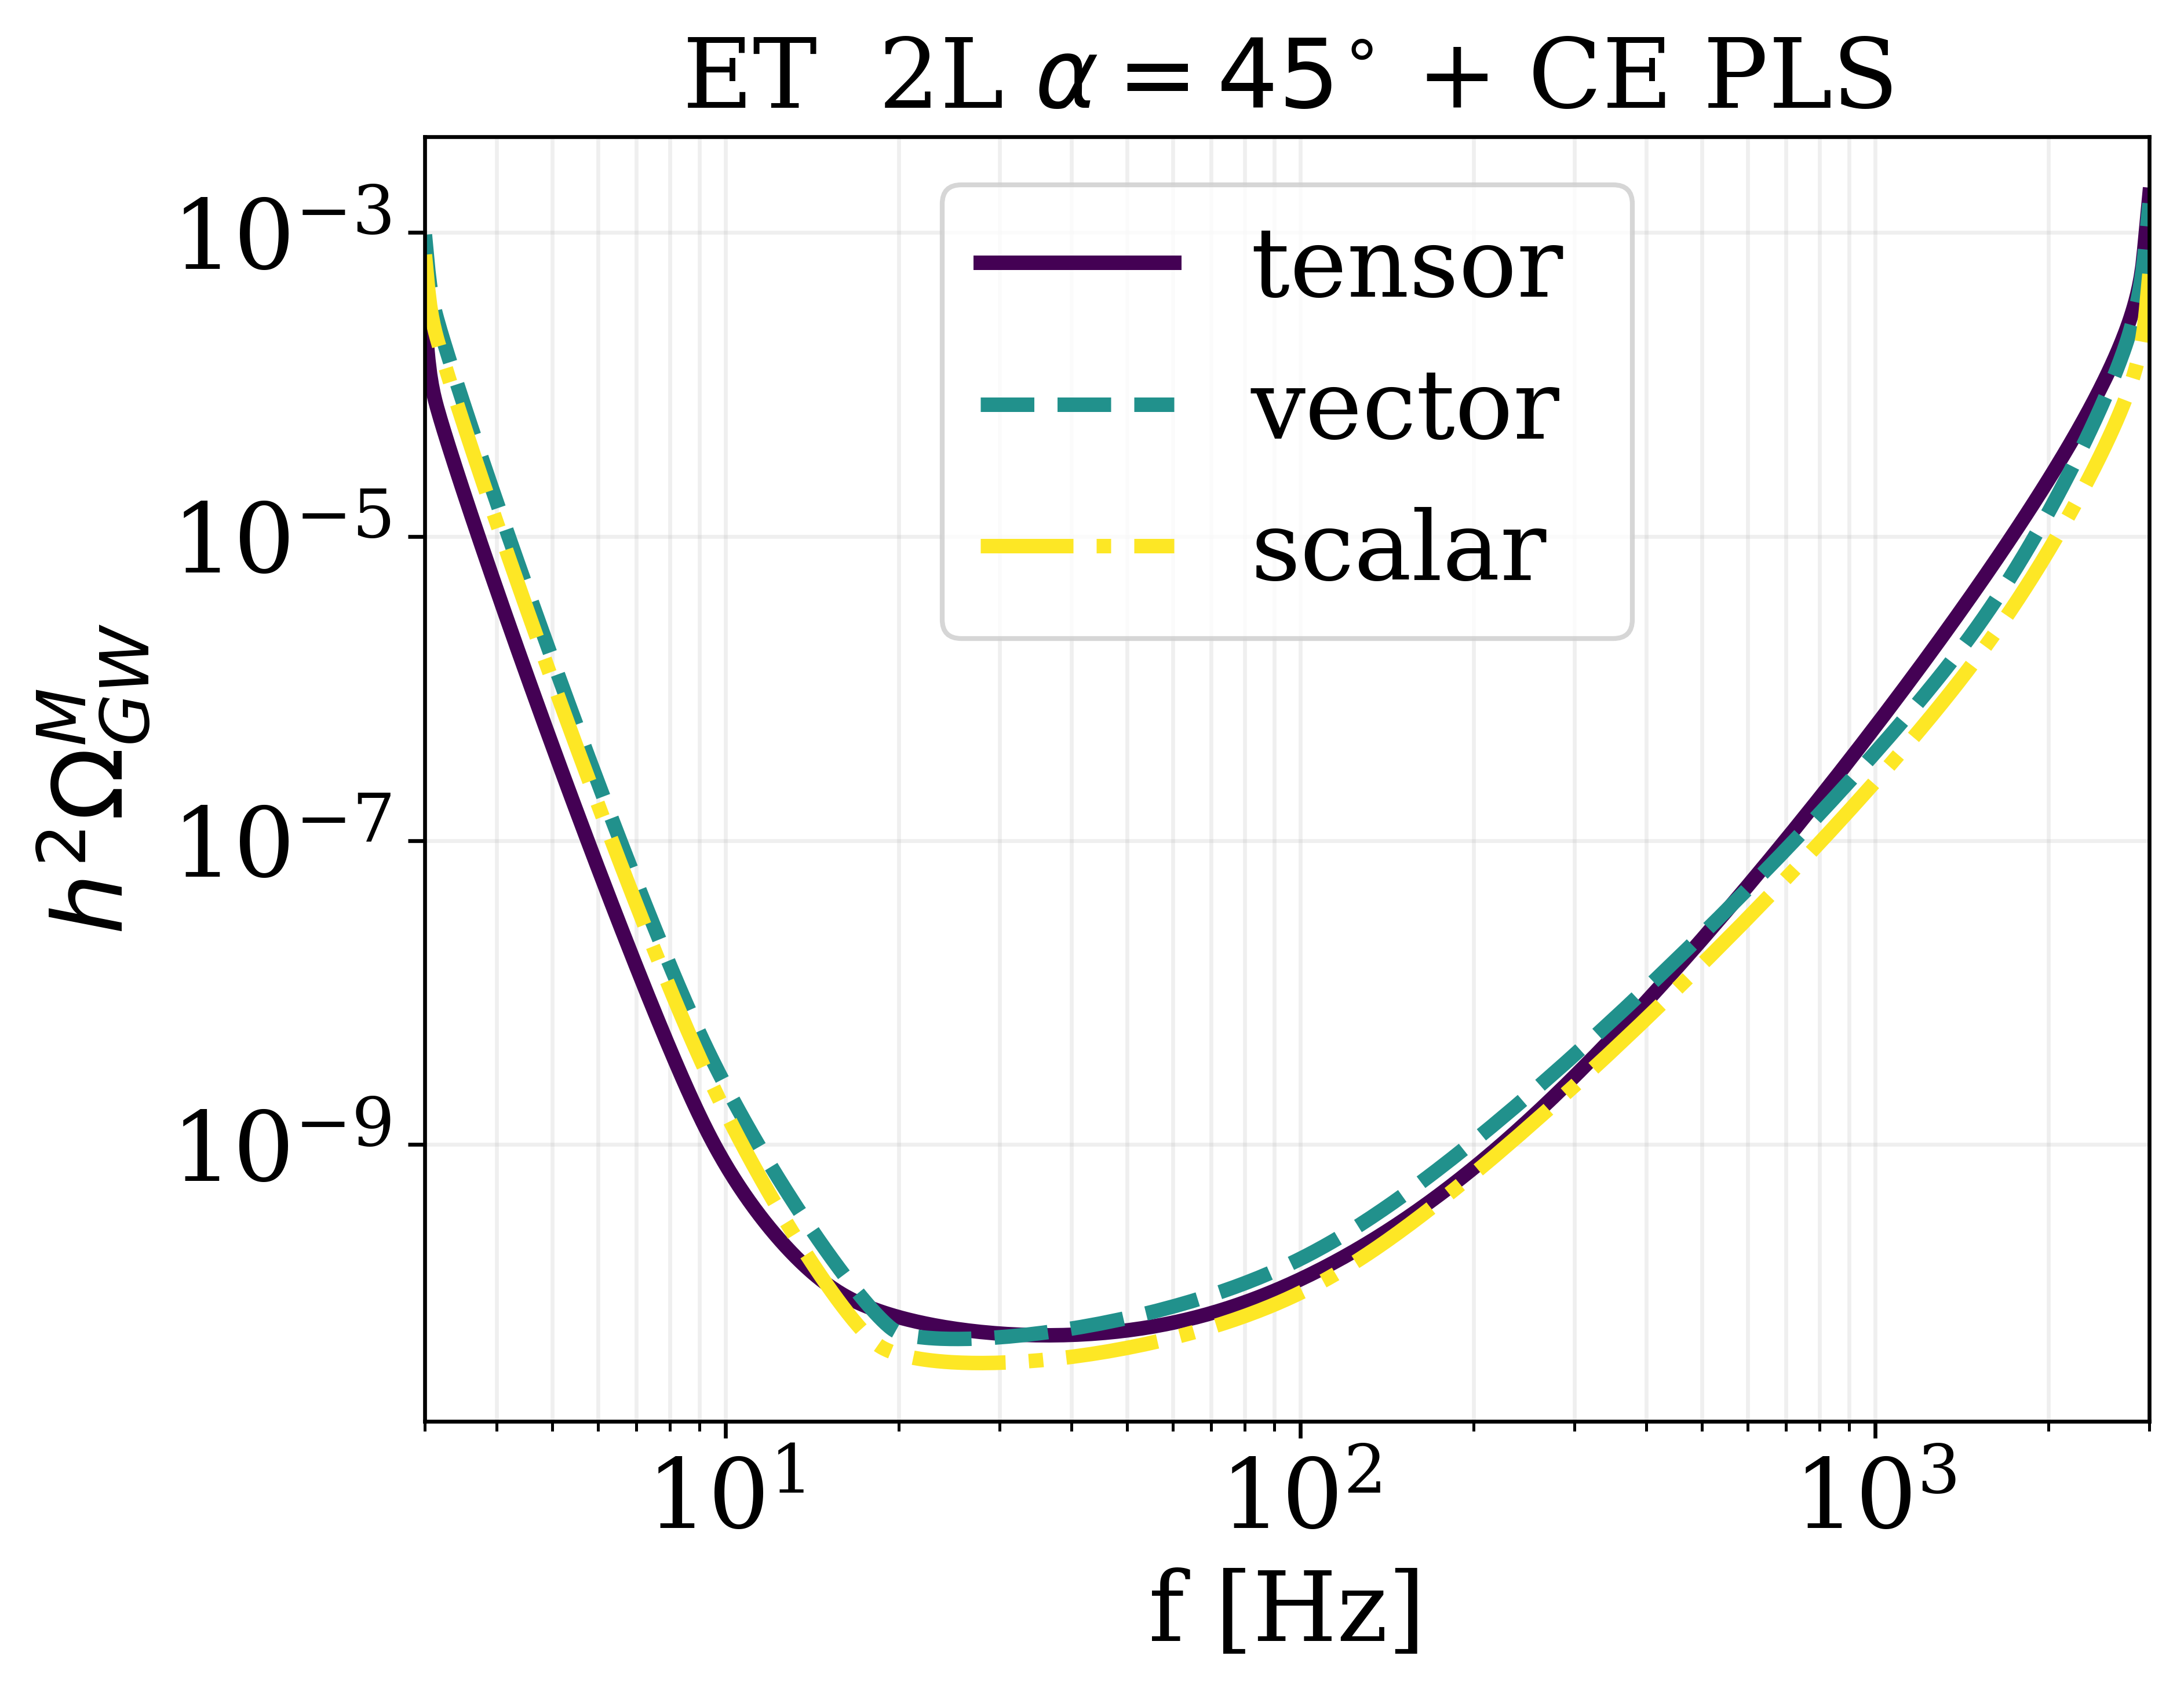

In [70]:
colors = plt.cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, pls_t_etCE, label='tensor ', color=colors[0], rasterized=True)
plt.plot(f, pls_v_etCE, label='vector', linestyle='--', color=colors[1], rasterized=True)
plt.plot(f, pls_s_etCE, label='scalar', linestyle='-.', color=colors[2], rasterized=True)
#plt.plot(f, pls_t_etCE_2, label='tensor ref', linestyle=':')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{GW}^{M}$')
plt.title(r'ET  2L $\alpha = 45^{\circ}$ + CE PLS')
plt.xlim(3, 3e3)
plt.grid(alpha=0.2, which='both')
plt.legend()

In [71]:
print(np.min(pls_t_etCE))
print(np.min(pls_v_etCE))
print(np.min(pls_s_etCE))

5.563162692197901e-11
5.263739495252111e-11
3.654547730573406e-11
